In [42]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import os

import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
def load_text_data(file):
    with open(file, "r", encoding='utf-8') as f:
        data = f.readline()
    return data

In [44]:
def get_text_info(datadir):
    text_files = [f for f in os.listdir(datadir) if f.lower().endswith('.txt')]
    text_dict = {'text_name':[],'text_detail':[]}
    for text_file in text_files:
        file_temp = "{}{}".format(datadir,text_file)
        text = load_text_data(file_temp)
        text_dict['text_name'].append(text_file)
        text_dict['text_detail'].append(text)
    return text_dict
        

In [45]:
get_text_info("D:\\113_files\\")

{'text_name': ['- Master Service Agreement - 10-18-2021 - 10-18-2099.txt',
  '0000000 - SFA - 09-22-2021 - 09-21-2023.txt',
  '1031717-NGA-MSA-010119-123122.txt',
  '1044256-NGA-MSA-110618-110621.txt',
  '1044256-NGA-MSA-110618-1106211.txt',
  '1044542-NGA-MSA-031819-031820.txt',
  'Alight_IDMWorks.txt',
  'Alight_Supplier_Framework_Agreement_-_Dileoz_NV.docx.txt',
  'ASAP_Staffing_-_SFA.txt',
  'Beecher Reagan-Alight SFA (9-16-21).txt',
  'BLUEWAVE SELECT LTD - MSA.txt',
  'Freemont Associates - SFA.txt',
  'Imbri Resourcing 1042908 MSA.txt',
  'Infocom SFA.txt',
  'LEADINGDEV SOLUTIONS SL. 1044585 SFA.txt',
  'LM Consulting - SFA.txt',
  'MSA signature page.txt',
  'MT SP Agt 05-13-09.txt',
  'My Corporate Ally MSA FY2021.txt',
  'NETREO INC-Master Service Agreement-Master Services Agreement-1-01-2015.txt',
  'Nevin Zimmermann LLC MSA.txt',
  'NEWSWEAVER-Master Service Agreement-Master Services Agreement-4-15-2017.txt',
  'NGA-Empower Agreement Dec 30, 2014 - Fully Executed.txt',
  '

In [46]:
df = pd.DataFrame(get_text_info("D:\\113_files\\"))
df

text_name  \
0    - Master Service Agreement - 10-18-2021 - 10-1...   
1          0000000 - SFA - 09-22-2021 - 09-21-2023.txt   
2                    1031717-NGA-MSA-010119-123122.txt   
3                    1044256-NGA-MSA-110618-110621.txt   
4                   1044256-NGA-MSA-110618-1106211.txt   
..                                                 ...   
108  VANGUARD SYSTEMS INC-Master Software License A...   
109  VELOCITY SOFTWARE INC-Master Software License ...   
110  VERINT AMERICAS INC-Master Software License Ag...   
111                             vFairs_-_MSA_FINAL.txt   
112  VISION CRITICAL COMMUNICATIONS US INC-Master S...   

                                           text_detail  
0    docusign envelope id 56161aae-63e6 4b58 b11d-4...  
1    docusign envelope id 25339dca-2b39 4bf3 9ba2 3...  
2    docusign envelope id 39a25b39 9e3a-4775 bd1d-2...  
3    docusign envelope id df4551b5 508f-4cca be93 e...  
4    docusign envelope id df4551b5 508f-4cca be93 e...  
..                                                 ...  
108  vanc — integrity professional 2230 west chapma...  
109  program product license agreement licensee add...  
110  verint master software license service support...  
111  docusign envelope id 29972179 6c33 41d7 bd16 d...  
112  west feet aa eae ni ee ul fp ewmil tf vode 2a ...  

[113 rows x 2 columns]

In [41]:
kmeans = KMeans(n_clusters=5,max_iter=50)
kmeans.fit(df)
df.columns

ValueError: could not convert string to float: '- Master Service Agreement - 10-18-2021 - 10-18-2099.txt'

In [24]:
text_list = df['text_detail'].to_list()
# for text_length in text_list:
#     print(len(text_length))
max_text_length = max([len(text_length) for text_length in text_list])
max_text_length

368060

In [25]:
feature = df['text_detail'].values.astype("U")

In [26]:
text_to_vector = TfidfVectorizer(lowercase=True,max_features=max_text_length)
text_to_vector

TfidfVectorizer(max_features=368060)

In [27]:
feature = text_to_vector.fit_transform(feature)
feature

<113x22272 sparse matrix of type '<class 'numpy.float64'>'
	with 184097 stored elements in Compressed Sparse Row format>

In [29]:
kmeans = KMeans(n_clusters=5,max_iter=50)
kmeans.fit(feature)

KMeans(max_iter=50, n_clusters=5)

In [30]:
kmeans.labels_

array([4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 1, 1, 4, 3, 4, 1,
       2, 2, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1, 0, 1, 4, 1, 1, 1,
       0, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 3, 1, 4, 1, 1, 1, 1, 1, 0, 1, 4,
       4, 1, 2, 4, 1, 1, 1, 3, 1, 2, 1, 4, 1, 4, 3, 1, 4, 1, 4, 1, 1, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 1, 1, 4, 4, 2, 0, 1, 1, 0, 1, 3, 1, 1, 1,
       1, 4, 1])

In [31]:
df['cluster_label'] = kmeans.labels_

In [51]:
# df

text_name  \
0                   1031717-NGA-MSA-010119-123122.txt   
1                  1036283-KMD-MSA-0627212-123125.txt   
2                   1039287-NGA-MSA-020113-013122.txt   
3                   1041815-MSA-GAC-110514-123123.txt   
4                   1043429-NGA-MSA-070115-070123.txt   
5                   1044021-NGA-MSA-022315-083123.txt   
6                   1044256-NGA-MSA-110618-110621.txt   
7                   1044542-NGA-MSA-031819-031820.txt   
8                                   3219_MSA_2018.txt   
9   9 FOLDERS INC-Master Software License Agreemen...   
10  9 FOLDERS INC-Master Software License Agreemen...   
11                          Adqura MSA FINAL.docx.txt   
12  ALCHAVO COM-Master Service Agreement-Master Se...   
13                    Alight-MCA MSA 051721 Final.txt   
14  AllianceBernstein, LP-Master Service Agreement...   
15  B&B Printing Company Inc-Master Service Agreem...   
16                      BLUEWAVE SELECT LTD - MSA.txt   
17                                        CDW_MSA.txt   

                                          text_detail  cluster_label  
0   docusign envelope id 39a25b39 9e3a-4775 bd1d-2...              1  
1   page 1 4 allonge agreement october 2012 northg...              4  
2   northgatearinso popay corporate northgatearins...              1  
3   agreement sub supply products services agreeme...              1  
4   — — nrg northgatearinso confidential strategic...              1  
5   northgatearinso 1 confidential strategic partn...              1  
6   docusign envelope id df4551b5 508f-4cca be93 e...              1  
7   docusign envelope id 2db67719 a083 4c32 a1ad-2...              1  
8   docusign envelope id af4do0af b182 48f2 9ac6-e...              2  
9   master software license agreement master softw...              3  
10  master software license agreement master softw...              3  
11  docusign envelope id ebb71570-a79d-4f8c b244 1...              2  
12  master service agreement “ agreement ” entered...              2  
13  docusign envelope id 9a3c7047 507f-4143 95f3 8...              0  
14  master services agreement master service agree...              0  
15  master service agreement master service agreem...              2  
16  docusign envelope id 6cc1f603 6523 47c3 bb55 c...              1  
17  master product service agreement master produc...              2

In [32]:
range_in_cluster = [2,3,4,5,6,7,8]
ssd = {"num_cluster":[],"variance":[]}
for num_in_cluster in range_in_cluster:
    kmeans = KMeans(n_clusters=num_in_cluster,max_iter=50)
    kmeans.fit(feature)
    ssd["num_cluster"].append(num_in_cluster)
    ssd["variance"].append(kmeans.inertia_)

    

In [33]:
ssd

{'num_cluster': [2, 3, 4, 5, 6, 7, 8],
 'variance': [78.65801173296366,
  73.09662273809091,
  71.25196061226683,
  65.53296673912077,
  63.64771421320831,
  61.209661081559055,
  59.46892730879326]}

In [34]:
import matplotlib.pyplot as plt
range_in_cluster = [2,3,4,5,6,7,8]
num_cluster_temp=[]
variance = []
for num_in_cluster in range_in_cluster:
    
    kmeans = KMeans(n_clusters=num_in_cluster,max_iter=50)
    kmeans.fit(feature)
    num_cluster_temp.append(num_in_cluster)
    variance.append(kmeans.inertia_)    
plt.plot(num_cluster_temp,variance)

AttributeError: module 'matplotlib._api' has no attribute 'caching_module_getattr'

In [35]:
# silhauette analysis
range_in_cluster = [2,3,4,5,6,7,8]

for num_cluster in range_in_cluster:
    kmeans = KMeans(n_clusters=num_cluster,max_iter=50)
    kmeans.fit(feature)
    cluster_labels = kmeans.labels_
    silhoute_avg = silhouette_score(feature,cluster_labels)
    print("For num of cluster={0},the silhouette score is {1}".format(num_cluster,silhoute_avg))

For num of cluster=2,the silhouette score is 0.11573464830867967
For num of cluster=3,the silhouette score is 0.10577405743624238
For num of cluster=4,the silhouette score is 0.11347058933874621
For num of cluster=5,the silhouette score is 0.14116504561777118
For num of cluster=6,the silhouette score is 0.15588839442014002
For num of cluster=7,the silhouette score is 0.1595217607147045
For num of cluster=8,the silhouette score is 0.19001715538817243


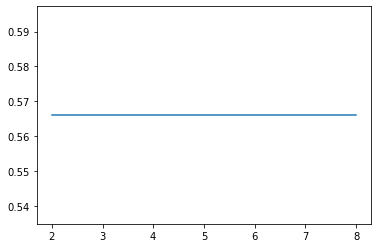

In [110]:
# range_in_cluster = [2,3,4,5,6,7,8]
# num_cluster_temp=[]
# score = []
# for num_in_cluster in range_in_cluster:
    
#     kmeans = KMeans(n_clusters=num_in_cluster,max_iter=50)
#     kmeans.fit(feature)
#     num_cluster_temp.append(num_in_cluster)
#     score.append(silhouette_score(feature,cluster_labels))    
# plt.plot(num_cluster_temp,score)

In [105]:
kmeans = KMeans(n_clusters=5,max_iter=50)
kmeans.fit(feature)
df['cluster_label'] = kmeans.labels_
df

text_name  \
0   - Master Service Agreement - 10-18-2021 - 10-1...   
1         0000000 - SFA - 09-22-2021 - 09-21-2023.txt   
2                   1031717-NGA-MSA-010119-123122.txt   
3                  1036283-KMD-MSA-0627212-123125.txt   
4                   1039287-NGA-MSA-020113-013122.txt   
5                   1041815-MSA-GAC-110514-123123.txt   
6                   1043429-NGA-MSA-070115-070123.txt   
7                   1044021-NGA-MSA-022315-083123.txt   
8                   1044256-NGA-MSA-110618-110621.txt   
9                  1044256-NGA-MSA-110618-1106211.txt   
10                  1044542-NGA-MSA-031819-031820.txt   
11                                  3219_MSA_2018.txt   
12  9 FOLDERS INC-Master Software License Agreemen...   
13  9 FOLDERS INC-Master Software License Agreemen...   
14                          Adqura MSA FINAL.docx.txt   
15  ALCHAVO COM-Master Service Agreement-Master Se...   
16                    Alight-MCA MSA 051721 Final.txt   
17                                Alight_IDMWorks.txt   
18  Alight_Supplier_Framework_Agreement_-_Dileoz_N...   
19  AllianceBernstein, LP-Master Service Agreement...   
20                            ASAP_Staffing_-_SFA.txt   
21  B&B Printing Company Inc-Master Service Agreem...   
22            Beecher Reagan-Alight SFA (9-16-21).txt   
23                      BLUEWAVE SELECT LTD - MSA.txt   
24                                        CDW_MSA.txt   
25                      Freemont Associates - SFA.txt   
26                   Imbri Resourcing 1042908 MSA.txt   
27                                    Infocom SFA.txt   
28           LEADINGDEV SOLUTIONS SL. 1044585 SFA.txt   
29                            LM Consulting - SFA.txt   
30       S-001338 - SFA - 09-10-2021 - 09-09-2023.txt   
31                SFA_Age_of_Human_202100807.docx.txt   
32  SFA_ZRG Partners LLC_v0.1_LB_20211007 edited_L...   
33  SUPP-00002602 - CURIOUS LION SFA SUPPLIER FRAM...   
34                                Topic SRL - MSA.txt   

                                          text_detail  cluster_label  
0   docusign envelope id 56161aae-63e6 4b58 b11d-4...              1  
1   docusign envelope id 25339dca-2b39 4bf3 9ba2 3...              1  
2   docusign envelope id 39a25b39 9e3a-4775 bd1d-2...              1  
3   page 1 4 allonge agreement october 2012 northg...              4  
4   northgatearinso popay corporate northgatearins...              0  
5   agreement sub supply products services agreeme...              0  
6   — — nrg northgatearinso confidential strategic...              0  
7   northgatearinso 1 confidential strategic partn...              0  
8   docusign envelope id df4551b5 508f-4cca be93 e...              1  
9   docusign envelope id df4551b5 508f-4cca be93 e...              1  
10  docusign envelope id 2db67719 a083 4c32 a1ad-2...              1  
11  docusign envelope id af4do0af b182 48f2 9ac6-e...              2  
12  master software license agreement master softw...              3  
13  master software license agreement master softw...              3  
14  docusign envelope id ebb71570-a79d-4f8c b244 1...              2  
15  master service agreement “ agreement ” entered...              2  
16  docusign envelope id 9a3c7047 507f-4143 95f3 8...              2  
17  docusign envelope id 982fee5b-47f 1 4044 b091 ...              1  
18  docusign envelope id ob64beec-2ae3 449d-9131 6...              1  
19  master services agreement master service agree...              2  
20  docusign envelope id be1ecea2 00a2 473e-9e98 0...              1  
21  master service agreement master service agreem...              2  
22  docusign envelope id fb17aa9a-0187 4da4 91 1c ...              1  
23  docusign envelope id 6cc1f603 6523 47c3 bb55 c...              1  
24  master product service agreement master produc...              2  
25  docusign envelope id 3b03f9cc decc-4e78 a233 8...              1  
26  docusign envelope id 52b1f45f-13e8 4b15 b866 c...              1  
27 